<center><img src="https://github.com/DACSS-Spatial/data_forSpatial/raw/main/logo.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/DACSS-Spatial/GDF_OPS_applications/blob/main/gasandschools.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Moving Gas Stations away from Schools in Chicago, IL

# Getting ready

## Installations needed

In [1]:
!pip install osmnx mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 13.5 MB/s eta 0:00:00


## Data needed

### Official data preprocessing

In [2]:
import geopandas as gpd

filez="https://github.com/Spatial-Data-Analytics-2025/Homework2/raw/refs/heads/main/Chicago_City_Limits-shp.zip"
Chicago=gpd.read_file(filez)
Chicago.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         1 non-null      int32   
 1   NEWFIELD    1 non-null      object  
 2   COUNT_      1 non-null      int32   
 3   WARDNO      1 non-null      object  
 4   Shape__Are  1 non-null      float64 
 5   Shape__Len  1 non-null      float64 
 6   geometry    1 non-null      geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 180.0+ bytes


As you see, it is just one geometry:

In [3]:
Chicago

,FID,NEWFIELD,COUNT_,WARDNO,Shape__Are,Shape__Len,geometry
0,1,39,59,39,1.079359e+09,338303.841939,"MULTIPOLYGON (((-9756948.206 5157702.064, -975..."


The map we have has come projected:

In [4]:
Chicago.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Crowdsourced data pre processing

In [5]:
# Get gas stations in Chicago
import osmnx as ox

stations = ox.features_from_place("Chicago, Illinois, USA",
                                tags={'amenity': 'fuel'})

Notice we are getting several gas stations, already as a GDF:

In [6]:
stations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 431 entries, ('node', np.int64(308676840)) to ('way', np.int64(1434214597))
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   geometry                   431 non-null    geometry
 1   amenity                    431 non-null    object  
 2   brand                      408 non-null    object  
 3   brand:wikidata             369 non-null    object  
 4   name                       427 non-null    object  
 5   self_service               414 non-null    object  
 6   addr:city                  365 non-null    object  
 7   addr:housenumber           373 non-null    object  
 8   addr:postcode              365 non-null    object  
 9   addr:state                 365 non-null    object  
 10  addr:street                374 non-null    object  
 11  check_date                 11 non-null     object  
 12  ref                        3 n

OSM gave you stations unprojected:

In [7]:
stations.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Notice the multi-index:

In [8]:
stations

geometry  \
element  id                                                              
node     308676840                          POINT (-87.65638 41.92549)   
         5930381986                         POINT (-87.73534 41.86621)   
         7491820602                         POINT (-87.77172 41.93864)   
         9478438169                         POINT (-87.67863 41.94292)   
relation 18244064    POLYGON ((-87.69882 41.99011, -87.69897 41.990...   
...                                                                ...   
way      1395634852  POLYGON ((-87.63301 41.91239, -87.63297 41.912...   
         1418172653  POLYGON ((-87.7165 41.91053, -87.71655 41.9102...   
         1426565430  POLYGON ((-87.7872 41.99681, -87.78685 41.9969...   
         1427624690  POLYGON ((-87.66272 41.91132, -87.66274 41.911...   
         1434214597  POLYGON ((-87.64954 41.96851, -87.64962 41.968...   

                    amenity     brand brand:wikidata      name self_service  \
element  id                                                                   
node     308676840     fuel     Mobil     Q109676002     Mobil          yes   
         5930381986    fuel     Amoco        Q465952     Amoco          yes   
         7491820602    fuel  Marathon        Q458363  Marathon          yes   
         9478438169    fuel  Speedway       Q7575683  Speedway          yes   
relation 18244064      fuel        BP        Q152057        BP          yes   
...                     ...       ...            ...       ...          ...   
way      1395634852    fuel        BP        Q152057        BP          yes   
         1418172653    fuel  Speedway       Q7575683  Speedway          yes   
         1426565430    fuel     Exxon     Q109675651     Exxon          yes   
         1427624690    fuel        BP        Q152057        BP          yes   
         1434214597    fuel        BP        Q152057        BP          yes   

                    addr:city addr:housenumber addr:postcode addr:state  ...  \
element  id                                                              ...   
node     308676840        NaN              NaN           NaN        NaN  ...   
         5930381986       NaN              NaN           NaN        NaN  ...   
         7491820602   Chicago             5800         60634         IL  ...   
         9478438169   Chicago             3354         60618         IL  ...   
relation 18244064     Chicago             2751         60659         IL  ...   
...                       ...              ...           ...        ...  ...   
way      1395634852   Chicago             1647         60614         IL  ...   
         1418172653   Chicago             3554         60647         IL  ...   
         1426565430   Chicago             6367         60646         IL  ...   
         1427624690   Chicago             1600         60642         IL  ...   
         1434214597   Chicago              755         60640         IL  ...   

                    area landuse building:material roof:levels roof:shape  \
element  id                                                                 
node     308676840   NaN     NaN               NaN         NaN        NaN   
         5930381986  NaN     NaN               NaN         NaN        NaN   
         7491820602  NaN     NaN               NaN         NaN        NaN   
         9478438169  NaN     NaN               NaN         NaN        NaN   
relation 18244064    NaN     NaN               NaN         NaN        NaN   
...                  ...     ...               ...         ...        ...   
way      1395634852  NaN  retail               NaN         NaN        NaN   
         1418172653  NaN     NaN               NaN         NaN        NaN   
         1426565430  NaN     NaN               NaN         NaN        NaN   
         1427624690  NaN     NaN               NaN         NaN        NaN   
         1434214597  NaN  retail               NaN         NaN        NaN   

                    industri

In the multi index you see **nodes**, **relations**, and **ways**:

In [9]:
stations.index

MultiIndex([(    'node',  308676840),
            (    'node', 5930381986),
            (    'node', 7491820602),
            (    'node', 9478438169),
            ('relation',   18244064),
            ('relation',   19362395),
            (     'way',   47098909),
            (     'way',  148902942),
            (     'way',  148935731),
            (     'way',  151183999),
            ...
            (     'way', 1354016977),
            (     'way', 1354025487),
            (     'way', 1374256505),
            (     'way', 1380233612),
            (     'way', 1395634850),
            (     'way', 1395634852),
            (     'way', 1418172653),
            (     'way', 1426565430),
            (     'way', 1427624690),
            (     'way', 1434214597)],
           names=['element', 'id'], length=431)

Some formatting may be needed at this stage:

- This will put current indexes back into the data, and numbers will appear:

In [10]:
stations.reset_index(drop=False,inplace=True)
stations.head()

,element,id,geometry,amenity,brand,brand:wikidata,name,self_service,addr:city,addr:housenumber,...,area,landuse,building:material,roof:levels,roof:shape,industrial,changing_table,note,branch,type
0,node,308676840,POINT (-87.65638 41.92549),fuel,Mobil,Q109676002,Mobil,yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,5930381986,POINT (-87.73534 41.86621),fuel,Amoco,Q465952,Amoco,yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,7491820602,POINT (-87.77172 41.93864),fuel,Marathon,Q458363,Marathon,yes,Chicago,5800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,9478438169,POINT (-87.67863 41.94292),fuel,Speedway,Q7575683,Speedway,yes,Chicago,3354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,relation,18244064,"POLYGON ((-87.69882 41.99011, -87.69897 41.990...",fuel,BP,Q152057,BP,yes,Chicago,2751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon


- Keep some columns:

In [11]:
colsToKeep=['element','name','geometry']
fuelChicago=stations[colsToKeep].copy()

- Reproject the data:

In [12]:
Chicago_crs = "EPSG:3857"

fuelChicago = fuelChicago.to_crs(Chicago_crs)

- Review:

In [13]:
fuelChicago.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   element   431 non-null    object  
 1   name      427 non-null    object  
 2   geometry  431 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 10.2+ KB


- From above, columns **name** of the gas station has missing values. We should rename those missing values:

In [14]:
fuelChicago.fillna({'name':'Unknown'},inplace=True)

- We usually use the names as row index. But row index should not have duplicates. Since several 'names' are the same (_Unknown_), we have to create new names:

In [15]:
fuelChicago.index.astype(str)+"_"+fuelChicago.name

,0
0,0_Mobil
1,1_Amoco
2,2_Marathon
3,3_Speedway
4,4_BP
...,...
426,426_BP
427,427_Speedway
428,428_Exxon
429,429_BP


Then,

In [16]:
fuelChicago['newname']=fuelChicago.index.astype(str)+"_"+fuelChicago.name
fuelChicago.set_index('newname',inplace=True)
fuelChicago.drop(columns=['name'],inplace=True)
fuelChicago.head()

,element,geometry
newname,,
0_Mobil,node,POINT (-9757863.497 5149824.255)
1_Amoco,node,POINT (-9766652.961 5140959.745)
2_Marathon,node,POINT (-9770703.444 5151792.665)
3_Speedway,node,POINT (-9760340.467 5152433.372)
4_BP,relation,"POLYGON ((-9762588.208 5159497.756, -9762604.1..."


See that **nodes** are points, **ways** are lines or simple shapes built from points, and **relations** are conceptual containers that group any of the other elements to represent complex features.

Let me compare with the geometries available:


In [17]:
import pandas as pd

pd.crosstab(fuelChicago.element,fuelChicago.geometry.geom_type, margins=True)


col_0,Point,Polygon,All
element,,,
node,4,0,4
relation,0,2,2
way,0,425,425
All,4,427,431


This is the 'relation' we have:

Let me get the schools:

In [20]:
# Get schools in Chicago
schools = ox.features_from_place("Chicago, Illinois, USA",
                                tags={'amenity': 'school'})
schools.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 1103 entries, ('node', np.int64(354049578)) to ('way', np.int64(1443556422))
Data columns (total 89 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   geometry                      1103 non-null   geometry
 1   amenity                       1103 non-null   object  
 2   ele                           789 non-null    object  
 3   gnis:feature_id               807 non-null    object  
 4   name                          1042 non-null   object  
 5   denomination                  165 non-null    object  
 6   education                     80 non-null     object  
 7   religion                      187 non-null    object  
 8   addr:city                     675 non-null    object  
 9   addr:postcode                 674 non-null    object  
 10  addr:state                    673 non-null    object  
 11  addr:street                   689 non-null    o

Let's reformat this as we did before:

In [21]:
schools.reset_index(inplace=True)
schoolChicago=schools[['element','name','geometry']].copy()
schoolChicago.fillna({'name':'Unknown'},inplace=True)
schoolChicago['newname']=schoolChicago.index.astype(str)+"_"+schoolChicago.name
schoolChicago.set_index('newname',inplace=True)
schoolChicago.drop(columns=['name'],inplace=True)
schoolChicago = schoolChicago.to_crs(Chicago_crs)
schoolChicago.head()


,element,geometry
newname,,
0_All Saints School,node,POINT (-9754078.59 5115819.396)
1_Annunciation School,node,POINT (-9759509.534 5147761.561)
2_Assumption School,node,POINT (-9758859.773 5128832.683)
3_Bethany School,node,POINT (-9772108.207 5147679.602)
4_Saint Agnes of Bohemia School,node,POINT (-9764327.642 5137503.705)


See element vs geo:

In [22]:
pd.crosstab(schoolChicago.element,schoolChicago.geometry.geom_type, margins=True)

col_0,MultiPolygon,Point,Polygon,All
element,,,,
node,0,274,0,274
relation,14,0,4,18
way,0,0,811,811
All,14,274,815,1103


In [23]:
#original data
schools[(schools.element=='relation') & (schools.geometry.geom_type=='MultiPolygon')]

,element,id,geometry,amenity,ele,gnis:feature_id,name,denomination,education,religion,...,name:uk,short_name:en,language:fr,check_date:opening_hours,contact:phone,office,opening_hours:signed,type,layer,area
275,relation,5241077,"MULTIPOLYGON (((-87.66425 41.87756, -87.66428 ...",school,181,1837213,Whitney M. Young Magnet High School,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN
276,relation,5245906,"MULTIPOLYGON (((-87.68472 41.90294, -87.68468 ...",school,182,1826704,Roberto Clemente Community Academy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN
278,relation,15553911,"MULTIPOLYGON (((-87.62953 41.91059, -87.62952 ...",school,NaN,NaN,Latin School of Chicago,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,yes
281,relation,18257918,"MULTIPOLYGON (((-87.64553 41.81244, -87.64547 ...",school,182,409247,Graham Elementary School,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN
282,relation,18277232,"MULTIPOLYGON (((-87.66444 41.9039, -87.66444 4...",school,182,1829727,Near North Montessori School,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN
283,relation,19736558,"MULTIPOLYGON (((-87.65693 41.97025, -87.65693 ...",school,NaN,NaN,McCutcheon Elementary School,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN
284,relation,19736563,"MULTIPOLYGON (((-87.66379 41.80753, -87.66382 ...",school,NaN,NaN,Hamline Elementary School,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN
285,relation,19736600,"MULTIPOLYGON (((-87.65374 41.87792, -87.65451 ...",school,NaN,NaN,Skinner West Elementary School,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN
286,relation,19736606,"MULTIPOLYGON (((-87.66944 41.88332, -87.67052 ...",school,NaN,NaN,Rudolph Elementary Learning Center,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN
287,relation,19736615,"MULTIPOLYGON (((-87.71538 41.84478, -87.71542 ...",school,NaN,NaN,Cárdenas Elementary School,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN


<Axes: >

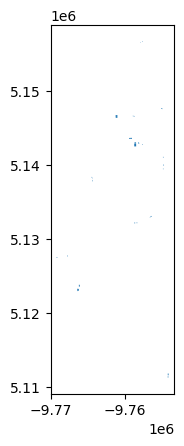

In [24]:
schoolChicago[(schoolChicago.element=='relation') & (schoolChicago.geometry.geom_type=='MultiPolygon')].plot()

In [25]:
base=Chicago.explore(tiles='cartodbpositron',color='lightblue')
schoolChicago.explore(m=base,color='k')
fuelChicago.explore(m=base,color='red')

# Explore proximity:


Let's compute a couple of distance matrices.

- The distance among fuel stations

In [26]:
D_Matrix_fuel_fuel=fuelChicago.geometry.apply\
(lambda station: fuelChicago.geometry.distance(station))

D_Matrix_fuel_fuel

newname,0_Mobil,1_Amoco,2_Marathon,3_Speedway,4_BP,5_Mobil,6_Mobil,7_Citgo,8_BP,9_BP,...,421_Clark,422_Shell,423_Exxon,424_76,425_Shell,426_BP,427_Speedway,428_Exxon,429_BP,430_BP
newname,,,,,,,,,,,,,,,,,,,,,
0_Mobil,0.000000,12483.357354,12989.952244,3597.620485,10765.663459,27905.661646,3251.521617,8479.099844,20032.524293,15387.303585,...,16409.700229,5550.816763,33690.243053,32998.557245,3336.960411,3218.187759,7011.483283,18041.838956,2233.456309,6477.105454
1_Amoco,12483.357354,0.000000,11565.403408,13095.483797,18969.727119,25954.773002,11222.340713,10171.854804,19032.948106,15198.382051,...,12651.916208,11445.485942,26839.523229,27479.790410,13236.021881,13319.920554,6892.283316,20376.352192,10448.305748,18009.681152
2_Marathon,12989.952244,11565.403408,0.000000,10382.763764,11161.783145,15625.647621,14630.150786,17572.447936,28953.326269,3648.403331,...,23208.207981,7616.562349,38399.904366,38928.379016,15966.565707,15919.670179,7448.302316,8877.198578,12757.034955,14264.580206
3_Speedway,3597.620485,13095.483797,10382.763764,0.000000,7413.356418,24654.600673,6646.919670,11631.635316,23422.811265,12276.949219,...,19352.644680,2751.983793,36482.751868,36013.654841,6918.776962,6786.171258,6391.496189,14513.653152,5049.205851,4979.595512
4_BP,10765.663459,18969.727119,11161.783145,7413.356418,0.000000,20997.450949,13975.531845,19043.067937,30783.422176,10668.157703,...,26736.036184,7620.479539,43774.242431,43397.610845,13857.613031,13686.167621,12056.922145,9812.401619,12458.743452,6276.799121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426_BP,3218.187759,13319.920554,15919.670179,6786.171258,13686.167621,31048.282501,2065.348296,6522.326908,17305.600592,18501.750655,...,14434.855790,8702.766264,31716.146780,30746.765404,128.036890,0.000000,9250.728441,21259.878311,3269.763623,8521.358723
427_Speedway,7011.483283,6892.283316,7448.302316,6391.496189,12056.922145,23073.949184,7562.808439,10053.595526,21600.217654,10783.572181,...,16195.097523,4479.024857,32395.788485,32485.647898,9249.178017,9250.728441,0.000000,15123.136073,5879.316578,11370.689274
428_Exxon,18041.838956,20376.352192,8877.198578,14513.653152,9812.401619,11144.474260,20699.602282,24826.763809,36666.932973,5429.860813,...,31393.699025,12694.633744,47151.083933,47519.529717,21376.422809,21259.878311,15123.136073,0.000000,18828.905696,15791.527297


From here, we can compute the minimal distance among those gas stations:

In [27]:
D_Matrix_fuel_fuel.replace(0,None,inplace=True) # avoid the zero
D_Matrix_fuel_fuel.min(axis=1).sort_values().head(10)

,0
newname,
194_BP,5.626703
193_BP,5.626703
77_BP,7.990211
78_BP,7.990211
140_Road Ranger,27.385307
138_Road Ranger,27.385307
68_Shell,31.703168
67_BP,31.703168
190_Amstar,41.419164


- The distance among gas stations and schools:

In [28]:
D_Matrix_fuel_school=fuelChicago.geometry.apply\
(lambda station: schoolChicago.geometry.distance(station))

D_Matrix_fuel_school

newname,0_All Saints School,1_Annunciation School,2_Assumption School,3_Bethany School,4_Saint Agnes of Bohemia School,5_Christ School,6_Concordia School,7_Cornell School,8_Ebenezer School,9_Gloria Dei School,...,1093_Chicago Jewish Day School,1094_Unknown,1095_Frances Xavier Ward School,1096_Socorro Sandoval Elementary School,1097_Chappell Elementary School,1098_Belmont Cragin Elementary School,1099_Hanson Park Elementary School,1100_Dr. Jorge Prieto Math and Science Academy,1101_Tarkington Elementary School,1102_Perspectives Rodney D. Joslin High School
newname,,,,,,,,,,,,,,,,,,,,,
0_Mobil,34214.849853,2638.966283,21015.200411,14405.251659,13913.342831,11829.285329,4658.911160,25820.574282,11852.075948,22681.728924,...,5801.516928,3375.408989,5345.469440,20694.698673,7978.659029,13568.238860,11669.709754,11937.620245,24602.151978,10751.681617
1_Amoco,28109.642077,9863.734192,14415.249430,8655.413111,4165.491905,6713.105741,11761.879391,21922.188619,1246.017387,10859.512179,...,12981.639504,9039.113327,12749.355628,11171.689068,17251.041591,9890.632083,8858.551641,8715.216886,15419.429886,11937.218388
2_Marathon,39629.052976,11897.622017,25834.730339,4346.336895,15646.891573,4880.563929,8619.703489,32953.087274,12276.808275,21213.839928,...,8265.690364,11301.781899,17180.240250,22685.323373,11168.263300,2181.710623,2416.403603,2673.128690,26903.750485,20087.357062
3_Speedway,37145.583245,4745.131086,23647.092281,12691.651368,15452.912793,10492.172834,1855.511205,28983.532366,12786.816921,23836.187804,...,2339.977490,5027.108862,8925.072897,22666.616094,4835.872924,11415.759963,9620.952008,9990.707338,26764.118295,14052.974849
4_BP,44499.580905,12133.280600,30890.903104,15150.780830,22059.340202,14117.215048,7716.435190,36396.237541,19001.191491,29801.898101,...,5969.085286,12308.529237,16056.104527,29462.248025,2679.084363,13145.878527,12077.316334,12564.239339,33656.552592,21443.524758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426_BP,32066.023229,4248.514013,19368.602525,16846.957113,13766.702099,14132.621576,7843.434614,23408.124889,12438.346582,22633.225541,...,9019.492357,4975.298541,2416.873137,19836.728489,10825.546281,16261.124134,14334.407112,14567.779918,23456.574032,8358.509317
427_Speedway,33376.656742,5002.340783,19526.782505,7547.679138,10022.625952,4832.348399,4858.206572,26056.334176,6876.681677,17751.712242,...,6015.383600,4222.098958,9998.637773,17462.959199,10287.731849,7175.199967,5268.884297,5438.235154,21693.766123,12581.860512
428_Exxon,48302.115954,18133.347358,34452.001023,12825.387799,24381.726663,13747.550231,13504.732767,41247.863938,20995.348083,30013.916216,...,12049.258845,17848.949966,23195.323053,31533.044069,11856.935774,10803.094142,11246.515478,11547.104942,35763.208289,27398.015796


# Decision 1: Find the stations that should go away



Now, we could compute the minimal distance from a gas station to a school, and sort the stations by that value:

In [29]:
D_Matrix_fuel_school.min(axis=1).sort_values().head(10)

,0
newname,
120_BP,15.923683
171_Marathon,24.082627
274_Citgo,24.332362
195_Marathon,24.337994
299_Citgo,26.870434
337_Citgo,31.951713
332_Exxon,33.641101
348_Marathon,34.875905
359_Fuel Star,35.597240


By the previous exploration, we may decide that no station should at 50 or less from a school:

In [83]:
mindDist=75

# Decision 2: Secure perimeter of every school

Let's create the safe area around the school. This requires **buffer**:

In [84]:
schoolChicago_buffered=schoolChicago.buffer(mindDist)
schoolChicago_buffered

,0
newname,
0_All Saints School,"POLYGON ((-9754003.59 5115819.396, -9754003.95..."
1_Annunciation School,"POLYGON ((-9759434.534 5147761.561, -9759434.8..."
2_Assumption School,"POLYGON ((-9758784.773 5128832.683, -9758785.1..."
3_Bethany School,"POLYGON ((-9772033.207 5147679.602, -9772033.5..."
4_Saint Agnes of Bohemia School,"POLYGON ((-9764252.642 5137503.705, -9764253.0..."
...,...
1098_Belmont Cragin Elementary School,"POLYGON ((-9771602.26 5149756.106, -9771599.94..."
1099_Hanson Park Elementary School,"POLYGON ((-9769732.414 5149379.499, -9769738.1..."
1100_Dr. Jorge Prieto Math and Science Academy,"POLYGON ((-9770040.592 5149278.505, -9769867.9..."


In [85]:
#remember we have
type(schoolChicago_buffered)

geopandas.geoseries.GeoSeries

Turning GS into GDF:

In [86]:
secured_schoolChicago=gpd.GeoDataFrame(geometry=schoolChicago_buffered)
secured_schoolChicago

,geometry
newname,
0_All Saints School,"POLYGON ((-9754003.59 5115819.396, -9754003.95..."
1_Annunciation School,"POLYGON ((-9759434.534 5147761.561, -9759434.8..."
2_Assumption School,"POLYGON ((-9758784.773 5128832.683, -9758785.1..."
3_Bethany School,"POLYGON ((-9772033.207 5147679.602, -9772033.5..."
4_Saint Agnes of Bohemia School,"POLYGON ((-9764252.642 5137503.705, -9764253.0..."
...,...
1098_Belmont Cragin Elementary School,"POLYGON ((-9771602.26 5149756.106, -9771599.94..."
1099_Hanson Park Elementary School,"POLYGON ((-9769732.414 5149379.499, -9769738.1..."
1100_Dr. Jorge Prieto Math and Science Academy,"POLYGON ((-9770040.592 5149278.505, -9769867.9..."


Buffers created polygons:

In [87]:
secured_schoolChicago.geometry.geom_type.value_counts()

,count
Polygon,1095
MultiPolygon,8


# Decision 3: Standardized Gas stations geometries

Not all gas stations are points:

In [88]:
fuelChicago.geometry.geom_type.value_counts()

,count
Polygon,427
Point,4


The point is a simple representation. Then let's make a buffer of 10 meters for every station to make sure the station is selected even if we just had one of its points.

In [89]:
fuelChicago_allPoly=fuelChicago.copy()
fuelChicago_allPoly['geometry'] = [
    station.buffer(10) if station.geom_type == 'Point' else station
    for station in fuelChicago.geometry
]

In [90]:
# rechecking
fuelChicago_allPoly.geometry.geom_type.value_counts()

,count
Polygon,431


# Decision 4: SJoin to determine gas stations in trouble



In [98]:
fuelChicago_allPoly.sjoin(secured_schoolChicago,how='inner',predicate='intersects')

,element,geometry,newname_right
newname_left,,,
11_Shell,way,"POLYGON ((-9773411.591 5153868.804, -9773398.3...",930_Taft High School Freshman Academy
29_Citgo,way,"POLYGON ((-9767791.07 5145877.54, -9767790.713...",937_Ronald E. McNair Elementary School
31_Falcon,way,"POLYGON ((-9765669.843 5145339.564, -9765670.1...",866_Orr Academy High School
35_Citgo,way,"POLYGON ((-9765774.862 5151536.691, -9765775.1...",382_Aspira School
49_Peterson-Pulaski BP,way,"POLYGON ((-9765948.187 5159527.171, -9765960.6...",1087_Chicago International Northtown
63_Clark,way,"POLYGON ((-9769573.662 5150750.418, -9769563.8...",99_Austin Special Sheltered Work Center
104_Shell,way,"POLYGON ((-9765442.195 5140982.586, -9765492.9...",480_Frazier International Magnet School
120_BP,way,"POLYGON ((-9763671.336 5158408.931, -9763671.5...",457_Northside College Preparatory High School
129_Citgo,way,"POLYGON ((-9762021.47 5128983.902, -9762031.97...",212_Study Progress School


The obvious choice is using **sjoin** + **intersects** (why not within?).

In [99]:
gas_relocate=fuelChicago_allPoly.sjoin(secured_schoolChicago,how='inner',predicate='intersects')

It is possible the index may have duplicates:

In [100]:
is_duplicate = gas_relocate.index.duplicated(keep=False)

gas_relocate[is_duplicate]

,element,geometry,newname_right
newname_left,,,
348_Marathon,way,"POLYGON ((-9769337.297 5145206.45, -9769392.71...",799_Howe Elementary School
348_Marathon,way,"POLYGON ((-9769337.297 5145206.45, -9769392.71...",83_Austin Career Education Center


Remember our names are on the row index, then:

In [101]:
# put the index as a column: reset_index(drop=False)
# drop duplicates in that column:drop_duplicates(subset='newname_left')
# column bask to index : set_index('newname_left')

gas_relocate.reset_index(drop=False).\
drop_duplicates(subset='newname_left').\
set_index('newname_left')

,element,geometry,newname_right
newname_left,,,
11_Shell,way,"POLYGON ((-9773411.591 5153868.804, -9773398.3...",930_Taft High School Freshman Academy
29_Citgo,way,"POLYGON ((-9767791.07 5145877.54, -9767790.713...",937_Ronald E. McNair Elementary School
31_Falcon,way,"POLYGON ((-9765669.843 5145339.564, -9765670.1...",866_Orr Academy High School
35_Citgo,way,"POLYGON ((-9765774.862 5151536.691, -9765775.1...",382_Aspira School
49_Peterson-Pulaski BP,way,"POLYGON ((-9765948.187 5159527.171, -9765960.6...",1087_Chicago International Northtown
63_Clark,way,"POLYGON ((-9769573.662 5150750.418, -9769563.8...",99_Austin Special Sheltered Work Center
104_Shell,way,"POLYGON ((-9765442.195 5140982.586, -9765492.9...",480_Frazier International Magnet School
120_BP,way,"POLYGON ((-9763671.336 5158408.931, -9763671.5...",457_Northside College Preparatory High School
129_Citgo,way,"POLYGON ((-9762021.47 5128983.902, -9762031.97...",212_Study Progress School


In [102]:
#making the actual change
gas_relocate= gas_relocate.reset_index(drop=False).drop_duplicates(subset='newname_left').\
              set_index('newname_left')

Let's see both schools and those stations to relocate:

In [103]:
base=secured_schoolChicago.sjoin(gas_relocate,how='inner',predicate='intersects').explore(color='yellow', tiles='cartodbpositron')
gas_relocate.explore(m=base,color='red')

# Decision 5: Find suitable places for the stations in trouble


We can not put the gas stations anywhere. They need to be situated on driveable routes, not inside a house or building.


- Find suitable locations along routes

Let's get the streets from Chicago with the help of OSM:

In [104]:
# Define the place
place = "Chicago, Illinois, USA"

# Download the street network graph for Chicago
G = ox.graph_from_place(place, network_type="drive")

# Convert the graph edges (streets) to a GeoDataFrame
streets = ox.graph_to_gdfs(G, nodes=False, edges=True)

streets.shape

(77125, 16)

You see we got a huge set of routes:

In [105]:
streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 77125 entries, (np.int64(702090), np.int64(261263104), np.int64(0)) to (np.int64(13250520832), np.int64(261109986), np.int64(0))
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     77125 non-null  object  
 1   highway   77125 non-null  object  
 2   oneway    77125 non-null  bool    
 3   reversed  77125 non-null  object  
 4   length    77125 non-null  float64 
 5   geometry  77125 non-null  geometry
 6   lanes     16264 non-null  object  
 7   maxspeed  6152 non-null   object  
 8   name      75815 non-null  object  
 9   ref       2711 non-null   object  
 10  bridge    859 non-null    object  
 11  access    336 non-null    object  
 12  tunnel    559 non-null    object  
 13  width     98 non-null     object  
 14  junction  133 non-null    object  
 15  area      2 non-null      object  
dtypes: bool(1), float64(1), geometry(1), object(13)
memory 

Let's pay attention to the 'highway' column:

In [106]:
streets.highway.value_counts().index

Index([                   'residential',                      'secondary',
                             'tertiary',                        'primary',
                         'unclassified',                  'motorway_link',
                             'motorway',                          'trunk',
                       'secondary_link',                         'busway',
                           'trunk_link',                  'emergency_bay',
                         'primary_link',                  'living_street',
                        'tertiary_link',  ['unclassified', 'residential'],
            ['residential', 'tertiary'],                         'closed',
              ['secondary', 'tertiary'],    ['unclassified', 'secondary'],
         ['motorway_link', 'secondary'],     ['unclassified', 'tertiary'],
              ['closed', 'residential'],     ['secondary', 'residential'],
       ['living_street', 'residential']],
      dtype='object', name='highway')

In [107]:
GAS_STATION_ROAD_TYPES = [
    'motorway',      # High-speed limited access roads
    'primary',       # Major national roads
    'trunk',         # Important regional roads
    'motorway_link', # Motorway entrance/exit ramps
    'primary_link',  # Primary road connectors
    'trunk_link',     # Trunk road connectors
    ['motorway', 'trunk'],
    ['primary', 'motorway_link'],
    ['primary', 'primary_link']
]

suitable_roads = streets[streets.highway.isin(GAS_STATION_ROAD_TYPES)]

suitable_roads.shape

(3422, 16)

Let's reproject:

In [108]:
suitable_roads = suitable_roads.to_crs(Chicago.crs)

The possible locations should be:
- Far enough from schools. They should be far from the GDF **secured_schoolChicago** (already buffered with a secure radius) .
- Far from other Gast stations. From **fuelChicago_allPoly** we could add a secured distance. This GDF was was buffered, but just to include the building, so we need to re buffer.

Then, we need to create a buffer around the stations:

In [109]:
competitionDistance=100 # a safe value from above 'D_Matrix_fuel_fuel'
fuelChicago_allPoly_buffered=fuelChicago_allPoly.buffer(competitionDistance)

Do we have a GDF?

In [110]:
type(fuelChicago_allPoly_buffered)

geopandas.geoseries.GeoSeries

In [111]:
secured_fuelChicago_allPoly=gpd.GeoDataFrame(geometry=fuelChicago_allPoly_buffered)


Let's combine the secured areas:



In [112]:
secured_areas_dissolved=secured_fuelChicago_allPoly.overlay(secured_schoolChicago,how='union',keep_geom_type=False).dissolve()
secured_areas=gpd.GeoDataFrame(geometry=secured_areas_dissolved.geometry)

- Filter the roads. We can NOT choose a location that intersects with the secured areas:

Choose: **overlay**

<Axes: >

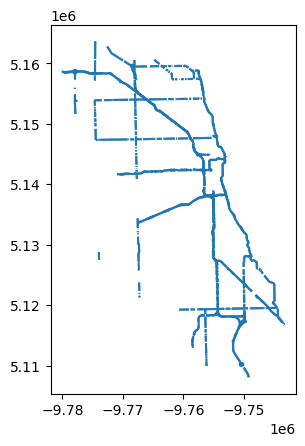

In [113]:
suitable_roads.overlay(secured_areas,keep_geom_type=False, how='difference').plot()

In [114]:
good_routes_forGas_dissolved=suitable_roads.overlay(secured_areas,keep_geom_type=False, how='difference').dissolve()
good_routes_forGas=gpd.GeoDataFrame(geometry=good_routes_forGas_dissolved.geometry)
good_routes_forGas

,geometry
0,"MULTILINESTRING ((-9775835.328 5158497.901, -9..."


<Axes: >

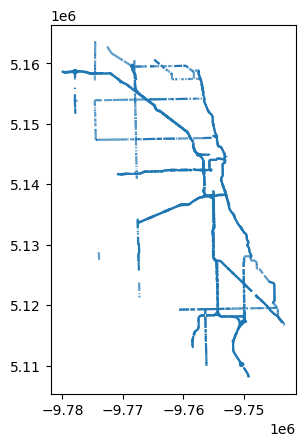

In [115]:
good_routes_forGas.plot()

We may choose a location from those places:

In [117]:
# newCOMPETITORS=safe_fuelCompetitors_gdf.copy()
potential_Locations=good_routes_forGas.copy()
newPOLYGONS=[]
pointsComputed=1
attempts=1
while pointsComputed<=len(gas_relocate):
  candidatePoint=potential_Locations.sample_points(1)
  candidateStation=gpd.GeoDataFrame(geometry=candidatePoint.buffer(100))
  if candidateStation.overlay(secured_areas,how='intersection',keep_geom_type=False).empty:
    newPOLYGONS.append(candidateStation)
    pointsComputed+=1
    potential_Locations=potential_Locations.overlay(candidateStation, how='difference', keep_geom_type=False)
  if attempts>len(gas_relocate)*10:
    break
  attempts+=1

# some info
attempts,len(newPOLYGONS)



(39, 31)

In [118]:
newPOLYGONS

[                                            geometry
 0  POLYGON ((-9747652.231 5121317.335, -9747652.7...,
                                             geometry
 0  POLYGON ((-9764240.801 5160192.444, -9764241.2...,
                                             geometry
 0  POLYGON ((-9751710.046 5119437.503, -9751710.5...,
                                             geometry
 0  POLYGON ((-9763302.627 5135397.987, -9763303.1...,
                                             geometry
 0  POLYGON ((-9756203.657 5114689.057, -9756204.1...,
                                             geometry
 0  POLYGON ((-9755082.868 5151122.625, -9755083.3...,
                                             geometry
 0  POLYGON ((-9755004.926 5128898.555, -9755005.4...,
                                             geometry
 0  POLYGON ((-9756026.959 5152637.917, -9756027.4...,
                                             geometry
 0  POLYGON ((-9756465.928 5139104.71, -9756466.41...,
                   

In [119]:
pd.concat(newPOLYGONS)

,geometry
0,"POLYGON ((-9747652.231 5121317.335, -9747652.7..."
0,"POLYGON ((-9764240.801 5160192.444, -9764241.2..."
0,"POLYGON ((-9751710.046 5119437.503, -9751710.5..."
0,"POLYGON ((-9763302.627 5135397.987, -9763303.1..."
0,"POLYGON ((-9756203.657 5114689.057, -9756204.1..."
0,"POLYGON ((-9755082.868 5151122.625, -9755083.3..."
0,"POLYGON ((-9755004.926 5128898.555, -9755005.4..."
0,"POLYGON ((-9756026.959 5152637.917, -9756027.4..."
0,"POLYGON ((-9756465.928 5139104.71, -9756466.41..."
0,"POLYGON ((-9754911.254 5149731.049, -9754911.7..."


In [120]:
GoodLocationsGas_buffered_gdf=pd.concat(newPOLYGONS)
GoodLocationsGas_gdf=gpd.GeoDataFrame(geometry=GoodLocationsGas_buffered_gdf.centroid)

<Axes: >

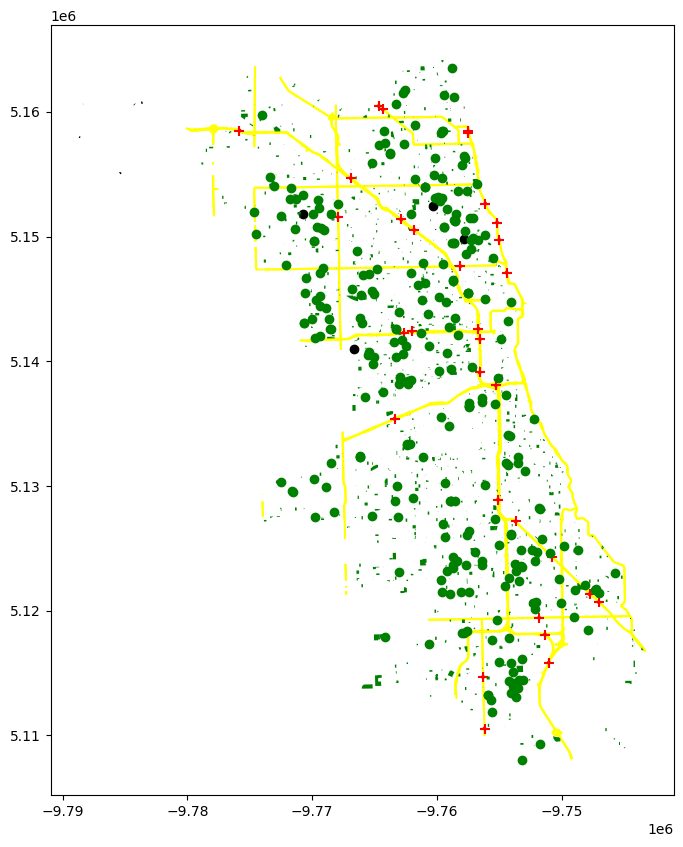

In [121]:
# original suitable roads
base = suitable_roads.plot(color='yellow', figsize=(10, 10),zorder=1)

# non-overlapping buffers
GoodLocationsGas_buffered_gdf.plot(ax=base, edgecolor='red', marker="+", facecolor='none',zorder=2)

# center points of the buffers
GoodLocationsGas_gdf.plot(ax=base, color='red', marker="+", markersize=50,zorder=3)

# all stations
fuelChicago.plot(ax=base,color='k',zorder=4)
schoolChicago.plot(ax=base,color='green',zorder=5)

# stations to relocate
fuelChicago.clip(gas_relocate).plot(ax=base,color='magenta',zorder=5)


## Reverse geocoding

Just get some addresses:

In [122]:
from geopy.geocoders import Nominatim
import time

# Initialize geocoder
geolocator = Nominatim(user_agent="Chicago_gas_stations")

def get_address(point):
  # Now coordinates are in degrees (lon, lat)
  lon = point.x
  lat = point.y
  location = geolocator.reverse((lat, lon), exactly_one=True, timeout=10)
  time.sleep(1)  # Rate limiting

  if location:
    return location.address
  else:
    return None # not found

In [126]:
# Get addresses
GoodLocationsGas_4326 = GoodLocationsGas_gdf.to_crs('EPSG:4326')
GoodLocationsGas_gdf['address'] = GoodLocationsGas_4326.geometry.apply(get_address)

In [127]:
GoodLocationsGas_gdf

,geometry,address
0,POINT (-9747752.231 5121317.335),"Chicago Skyway, Calumet Heights, Chicago, Hyde..."
0,POINT (-9764340.801 5160192.444),"Acorns Goodyear, 6200, North Lincoln Avenue, N..."
0,POINT (-9751810.046 5119437.503),"836, East 95th Street, Burnside, Chicago, Hyde..."
0,POINT (-9763402.627 5135397.987),"Adlai Stevenson Expressway, South Lawndale, Ch..."
0,POINT (-9756303.657 5114689.057),"11200, South Halsted Street, Morgan Park, Chic..."
0,POINT (-9755182.868 5151122.625),North Jean Baptiste Point DuSable Lake Shore D...
0,POINT (-9755104.926 5128898.555),"Dan Ryan Expressway (Local), Englewood, Chicag..."
0,POINT (-9756126.959 5152637.917),North Jean Baptiste Point DuSable Lake Shore D...
0,POINT (-9756565.928 5139104.71),"Dan Ryan Expressway, East Pilsen, Lower West S..."
0,POINT (-9755011.254 5149731.049),North Jean Baptiste Point DuSable Lake Shore D...


______

[BACK TO MAIN MENU](https://dacss-spatial.github.io/GDF_OPS_applications/)